데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 역문항을 변환 한 후 각 그룹(A-D)의 영역(Q1-Q5)별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. 
(각 통계량 별로 4x5 dataframe 생성)

In [19]:
import pandas as pd
import numpy as np
data=pd.read_csv("problem3.csv")

In [20]:
data.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


- 역변환(Q1-3, Q2-3, Q3-3, Q4-3, Q5-3)

In [21]:
for num in range(1,6):
    data[f'Q{num}-3'] =6 -data[f'Q{num}-3']

- 영역별 평균, 표준편차, 왜도, 첨도
- 평균(mean)
- 표준편차(std)
- 왜도(skew)
- 첨도(kurt)

In [52]:
for num in range(1,6):
    col_lst = ['group']
    for col in range(1,5):
        col_lst.append(f'Q{num}-{col}')
        
    target = data[col_lst]
    
    targetdf =target.set_index('group').unstack().to_frame().reset_index()[['group',0]].rename(columns ={0: f'Q{num}'})

    display(targetdf.groupby('group').agg(['mean','std','skew',pd.DataFrame.kurt]))

Q1                              
        mean       std      skew      kurt
group                                     
A      3.016  1.263860 -0.077803 -1.087887
B      3.042  1.242489 -0.126751 -1.022905
C      3.030  1.243642 -0.050626 -1.033246
D      2.991  1.264325 -0.069421 -1.081406

Q2                              
        mean       std      skew      kurt
group                                     
A      3.058  1.236999 -0.129390 -0.997133
B      3.048  1.266215 -0.111043 -1.060834
C      3.063  1.256427 -0.122030 -1.046603
D      3.091  1.249913 -0.166334 -1.018150

Q3                              
        mean       std      skew      kurt
group                                     
A      2.992  1.268679 -0.061600 -1.098330
B      3.050  1.238965 -0.117158 -1.035672
C      3.023  1.248210 -0.102330 -0.988577
D      3.034  1.255556 -0.128043 -1.043094

Q4                              
        mean       std      skew      kurt
group                                     
A      3.043  1.255678 -0.090314 -1.028166
B      3.041  1.240507 -0.071541 -1.014676
C      3.014  1.283531 -0.074531 -1.100094
D      3.080  1.268546 -0.144620 -1.006126

Q5                              
        mean       std      skew      kurt
group                                     
A      3.088  1.256119 -0.102638 -1.053632
B      2.983  1.272136 -0.055805 -1.080934
C      2.987  1.260325 -0.068696 -1.071557
D      2.989  1.250777 -0.065315 -1.055332

### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

In [54]:
from scipy.stats import shapiro
a=data[data['group']=='A']['Q1-1']
b=data[data['group']=='B']['Q1-1']
c=data[data['group']=='C']['Q1-1']
d=data[data['group']=='D']['Q1-1']

print(shapiro(a))
print(shapiro(b))
print(shapiro(c))
print(shapiro(d))

ShapiroResult(statistic=0.8959194421768188, pvalue=4.089666539447423e-12)
ShapiroResult(statistic=0.9031107425689697, pvalue=1.2895768654319628e-11)
ShapiroResult(statistic=0.9036667346954346, pvalue=1.4126045819184974e-11)
ShapiroResult(statistic=0.8961024284362793, pvalue=4.2081052184506085e-12)


모두 기각하므로 kruskal 검정

In [58]:
from scipy.stats import kruskal
kruskal(a,b,c,d)

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)

귀무가설을 기가할 수 없다. 즉 집단가의 모평균에는 차이가 없다.

### 3-3 요인분석을 수행하고 결과를 시각화

In [60]:
ana=data.drop(columns=['userid', 'group'])

In [71]:
#!pip install factor-analyzer

- Bartlett 테스트

: 탐색적 요인분석에 적합한 데이터인지 확인

In [64]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(ana)
chi_square_value, p_value

# 요인성 평가 결과 요인성 평가에 적합한 p-value( <0.05)를 확인

(232.67704188787167, 0.01887367698405033)

- Kaiser-Meyer_Olkin(KMO) 검정

: 0.6미만의 KMO값은 부적절한 것으로 간주되며 0.8이상이면 우수하다고 할 수 있다.
    
관측된 모든 변수간의 분산 비율 추정

관측된 각 변수와 전체 모델에 대한 적절성을 결정

In [65]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(ana)
kmo_model
# kmo 결과 0.6 이하는 부적합하다 본다

0.4901789141416504

- 요인 수 선택

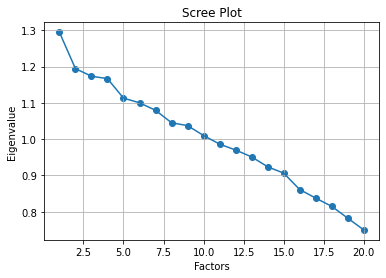

In [67]:
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(ana)

#Eigen값 체크 
ev, v = fa.get_eigenvalues()

plt.scatter(range(1,ana.shape[1]+1),ev)
plt.plot(range(1,ana.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#eigenvalue가 1이 되는지점인 10개의 요인이 선택에 적합한 숫자로 확인

<AxesSubplot:>

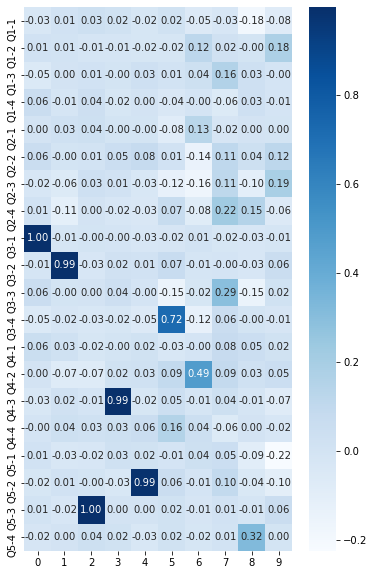

In [74]:
import seaborn as sns

fa = FactorAnalyzer(n_factors=10, rotation="varimax") #ml : 최대우도 방법
fa.fit(ana)
efa_result= pd.DataFrame(fa.loadings_, index=ana.columns)

plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

다른 사례를 보니 부호 상관없이 0.4정도 이상이면 묶이는 것으로(?)

- 요인0은 Q3-1에 대해 높은 요인 적재량을 가진다.
- 요인1은 Q3-2에 대해 높은 요인 적재량을 가진다.
- 요인2는 Q5-3에 대해 높은 요인 적재량을 가진다.
- 요인3은 Q4-3에 대해 높은 요인 적재량을 가진다.
- 요인4는 Q5-2에 대해 높은 요인 적재량을 가진다.
- 요인5는 Q3-4에 대해 높은 요인 적재량을 가진다.
- 요인6은 Q4-2에 대해 높은 요인 적재량을 가진다.
- 요인7에는 변수에 대해 높은 요인 적재량이 없다고 해석할 수 있다. 따라서 위의 7가지 요소만 활용하는 것이 좋다.

In [75]:
fa = FactorAnalyzer(n_factors=7, rotation="varimax") #ml : 최대우도 방법
fa.fit(ana)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

In [77]:
fa.get_factor_variance()
df1=pd.DataFrame(fa.get_factor_variance())

#행, 열 이름 설정
df1.index=['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3,4,5,6
SS Loadings,1.008050,0.988726,0.877933,0.409423,0.356336,0.269833,0.208008
Proportion Var,0.050402,0.049436,0.043897,0.020471,0.017817,0.013492,0.010400
Cumulative Var,0.050402,0.099839,0.143735,0.164207,0.182023,0.195515,0.205915
